In [52]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df_path = '/content/drive/MyDrive/Data Portfolio/movies.csv'
df = pd.read_csv(df_path)

pd.set_option('display.max_rows', None)

#Dataset from Kaggle https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download

Mounted at /content/drive


# Exploring and Cleaning the Data

In [53]:
#Checking that the data imported correctly

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [54]:
#Checking for null data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [55]:
#Checking data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [56]:
#Some of the years in the 'year' column don't match the release date so i'm going to drop the column and remake it via slicing the year from the 'released' column after verifying externally. 

#dropping incorrect year column
df.drop(columns='year') 

#regex to remove the country in () so I can convert it to datetime
df['released'] = df['released'].str.replace(r'\(.*\)', '') 

#converting to datetime and slicing out the year into a new column
df['released'] = pd.to_datetime(df['released'])
df['year'] = df['released'].dt.year
df.head()

<ipython-input-56-179703508302>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['released'] = df['released'].str.replace(r'\(.*\)', '')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [59]:
#Looking at some of the highest grossing films

df.sort_values(by=['gross'], inplace=False, ascending=False).head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009.0,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019.0,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997.0,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018.0,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019.0,2019-07-19,6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015.0,2015-06-12,7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012.0,2012-05-04,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015.0,2015-04-03,7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019.0,2019-11-22,6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0


In [62]:
#Dropping Duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## **Looking for Correlations**

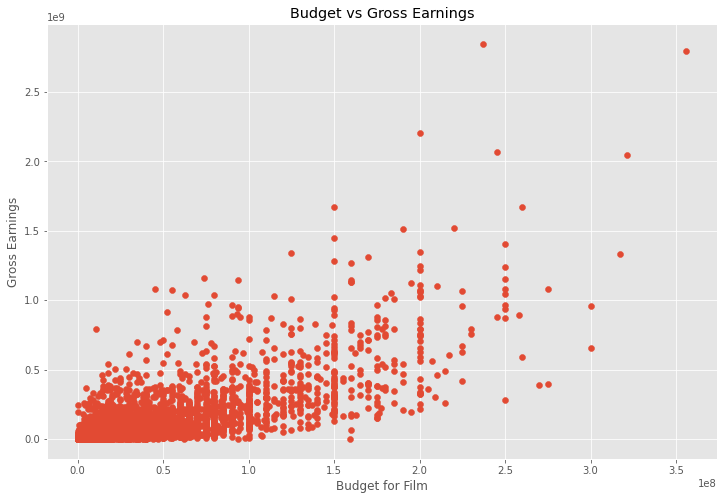

In [66]:
# Scatterplot for budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')
plt.show();

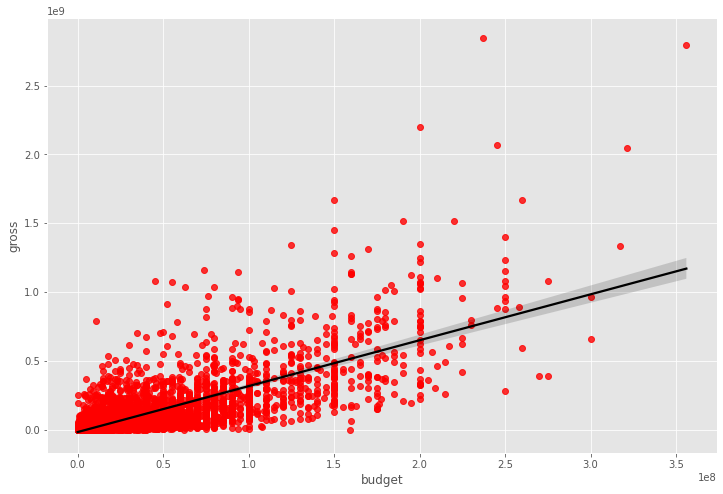

In [72]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color' : 'black'});

#Off first glance there appears to be a positive correlation between budget and gross

In [73]:
df.corr()

#Pearson Correlation Budget vs Gross correlation is high at .74

,year,score,votes,budget,gross,runtime
year,1.000000,0.105994,0.218429,0.321918,0.250514,0.120636
score,0.105994,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.218429,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.321918,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.250514,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120636,0.399451,0.309212,0.320447,0.245216,1.000000


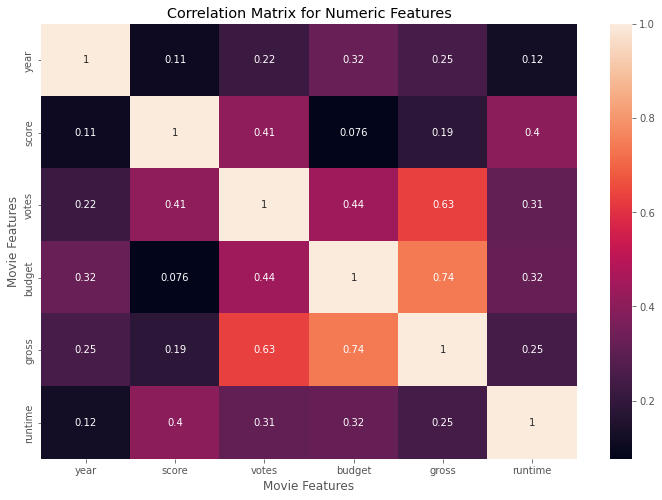

In [76]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [81]:
#Investigating if company and gross are correlated

df_numerized = df.copy()

#Assigning numerical identifier to text based data

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
      df_numerized[col_name] = df_numerized[col_name].astype('category')
      df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980.0,1980-06-13,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980.0,1980-07-02,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980.0,1980-06-20,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980.0,1980-07-02,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980.0,1980-07-25,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


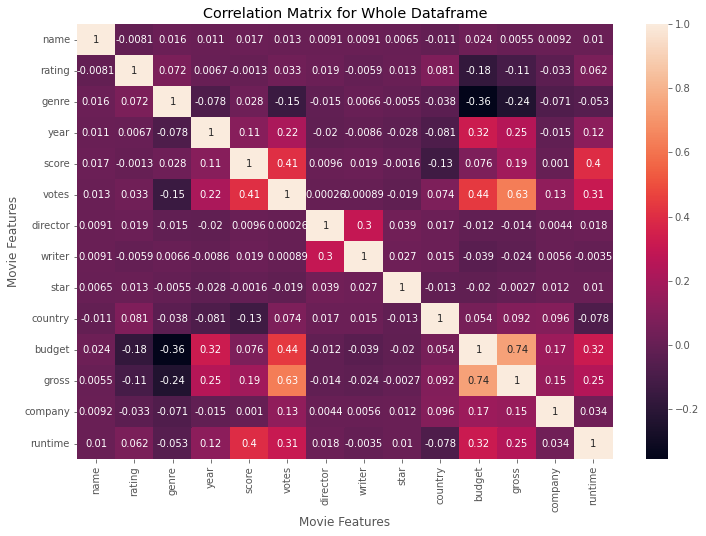

In [80]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Whole Dataframe')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [86]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name      1.000000
      rating   -0.008069
      genre     0.016355
      year      0.010699
      score     0.017097
dtype: float64

In [85]:
#creating a list view of only pairs that have a high correlation (greater than .5)
sorted_pairs = corr_pairs.sort_values()
sorted_pairs[(sorted_pairs) > 0.5]

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

I originally wanted to test and see if the budget and company had a high correlation with the gross earnings of a film. After analyzing I can confirm that the budget is highly correlated as expected, however the company does not seem to play a huge role in how much the film brings in.